# „Hello World“ des Machine Learning – Zeichenerkennung

Das Erkennen von handgeschriebenen Ziffern ist ein gut untersuchtes **Klassifikationsproblem**, zu dem es mehrere frei verfügbare Datensätze gibt.
Der bekannteste Datensatz ist der [MNIST](https://en.wikipedia.org/wiki/MNIST_database) Datensatz mit 60.000 Trainings- und 10.000 Testbeispielen. Der Datensatz stammt aus den USA, was sich insbesondere auf die Schreibweise der 1 und der 7 auswirkt.

Daneben bringt `scikit-learn` einen kleineren Datensatz mit 1797 Beispielen von der [University of California, Irvine](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits) mit, der ursprünglich von der Boğaziçi Üniversitesi in Istanbul stammt. 

Dieser kleinere Datensatz eignet sich gut für erste Experimente, außerdem kann man im Vergleich den Einfluß der Trainingsdatenmenge auf die Performance verschiedener Verfahren demonstrieren.

In [33]:
import matplotlib.pyplot as plt
import sklearn
from sklearn import svm, metrics

In [34]:
digits = sklearn.datasets.load_digits()

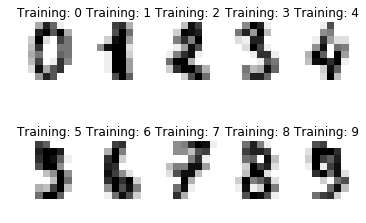

In [37]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Training: {label:d}')

In [38]:
n_samples = len(digits.images)
n_samples

1797

## Umformen der Bilder in Feature-Vektoren

Die Bilddaten liegen als `n_samples` 8x8-Matrizen vor. Für die Klassifikation wandeln wir die 8x8-Matrizen 
jeweils in einen 64-dimensionalen Vektor um.
Dazu verwenden wir die Methode `reshape()`.

In [39]:
print(f'shape: {digits.images.shape}')
data = digits.images.reshape((n_samples, -1))
print(f'new shape: {data.shape}')

shape: (1797, 8, 8)
new shape: (1797, 64)


## Zerlegung der Daten in Trainings- und Testdaten

In [40]:
(X_train, X_test, y_train, y_test ) = \
  sklearn.model_selection.train_test_split(data, digits.target, train_size=0.7)

print(f"train set: {len(X_train)}, test set: {len(X_test)}")

train set: 1257, test set: 540


## Training eines Klassifikators

Als Klassifikator verwenden wir eine Support Vector Machine (svm).

In [41]:
classifier = svm.SVC(gamma=0.001)

In [42]:
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [43]:
def evaluate(classifier, verbose=False):
    """ Print evaluation data for the classifier """
    predicted = classifier.predict(X_test)
    if verbose:
        print(f"Classification report for classifier {classifier}:")
        print(f"{metrics.classification_report(y_test, predicted)}")
        print(f"Confusion matrix:\n{metrics.confusion_matrix(y_test, predicted)}")
    
    return metrics.f1_score(y_test, predicted, average="weighted")

evaluate(classifier, verbose=True)

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       0.95      1.00      0.97        57
           2       1.00      1.00      1.00        47
           3       1.00      0.98      0.99        64
           4       1.00      0.95      0.97        59
           5       0.98      0.96      0.97        56
           6       0.98      1.00      0.99        56
           7       0.96      1.00      0.98        52
           8       0.94      0.94      0.94        50
           9       0.98      0.96      0.97        47

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98     

0.9796093412098569

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

classifiers = [ #DecisionTreeClassifier(),
                KNeighborsClassifier(),
                MLPClassifier(),
                #svm.SVC(gamma=0.001)
              ]

scores = {}

for classifier in classifiers:
    print(f"Training: {classifier.__class__.__name__}")
    classifier.fit(X_train, y_train)
    scores[classifier] = evaluate(classifier)
    
for (c, score) in sorted(scores.items(), key=lambda p: p[1], reverse=True):
    print(f"{c.__class__.__name__:25s}: {score:.3f}")

Training: KNeighborsClassifier
Training: MLPClassifier
MLPClassifier            : 0.977
KNeighborsClassifier     : 0.972


In [56]:
from sklearn.datasets import fetch_openml

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.

( X_train, X_test, y_train, y_test ) = \
  sklearn.model_selection.train_test_split(X, y, train_size=0.7)

len(X_train)

49000

In [51]:
import pickle

#with open("models.pkl", "wb") as file:
#    pickle.dump(scores, file)

with open("models.pkl", "rb") as file:
    scores = pickle.load(file)

for (c, score) in sorted(scores.items(), key=lambda p: p[1], reverse=True):
    print(f"{c.__class__.__name__:25s}: {score:.3f}")

MLPClassifier            : 0.976
KNeighborsClassifier     : 0.971
SVC                      : 0.936
DecisionTreeClassifier   : 0.870


In [50]:
(c, s) = [(p[0], p[1]) for p in scores.items()][2]
evaluate(c, verbose=True)

Classification report for classifier MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2057
           1       1.00      1.00      1.00      2362
           2       0.99      1.00      0.99      2061
           3       0.99      0.99      0.99      2149
           4       0.99      0.99      0.99      2103
           5       0.99      0.99      0.99      1919
           6       0.99      1.00      0.99      2089
           7       0.99      0.9

0.9929994819112641

49000